In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

%matplotlib inline
sns.set_style("darkgrid")

In [14]:
crime = pd.read_pickle("/content/drive/MyDrive/Colab data files/cmpe 255 data/project_data/Chicago_Crime_Processed_Data.pkl")

In [15]:
crime.head()

,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Day_num,Time,day_of_week,primary_type_grouped,zone,Count_CrimeType_Column
0,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,2015,41.815117,-87.670000,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,South,1640154.0
1,0870,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,2015,41.895080,-87.765400,9,4,11,Friday,THEFT,North,2327482.0
3,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,2015,41.937406,-87.716650,9,5,12,Saturday,NARCOTIC_OFFENSE,West,661033.0
4,0560,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,2015,41.881903,-87.755121,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,North,1640154.0
5,0610,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,2015,41.744379,-87.658431,9,5,10,Saturday,THEFT,South,2327482.0


In [16]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   IUCR                    object 
 1   Description             object 
 2   Location Description    object 
 3   Arrest                  bool   
 4   Domestic                bool   
 5   Beat                    int64  
 6   District                float64
 7   Ward                    float64
 8   Community Area          float64
 9   FBI Code                object 
 10  Year                    int64  
 11  Latitude                float64
 12  Longitude               float64
 13  Month                   int64  
 14  Day_num                 int64  
 15  Time                    int64  
 16  day_of_week             object 
 17  primary_type_grouped    object 
 18  zone                    object 
 19  Count_CrimeType_Column  float64
dtypes: bool(2), float64(6), int64(5), object(7)
memory usage: 973.2+ MB


In [17]:
crime.isnull().sum().sum()

5348

In [25]:
crime.apply(lambda x: sum(x.isnull()),axis=0)

IUCR                    0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
Year                    0
Latitude                0
Longitude               0
Month                   0
Day_num                 0
Time                    0
day_of_week             0
primary_type_grouped    0
zone                    0
dtype: int64

In [21]:
crime['primary_type_grouped'].unique()

array(['NON-CRIMINAL_ASSAULT', 'THEFT', 'NARCOTIC_OFFENSE',
       'OTHER_OFFENSE', 'CRIMINAL_OFFENSE', 'WEAPONS_OFFENSE',
       'SEXUAL_OFFENSE', 'HUMAN_TRAFFICKING_OFFENSE', nan], dtype=object)

In [20]:
crime = crime.drop(['Count_CrimeType_Column'], axis=1)

In [24]:
crime.dropna(subset=['primary_type_grouped'],inplace=True)
crime.reset_index(drop=True,inplace=True)

In [26]:
for col_name in crime.columns:
    if(crime[col_name].dtype == 'object'):
        crime[col_name]= crime[col_name].astype('category')
        crime[col_name] = crime[col_name].cat.codes

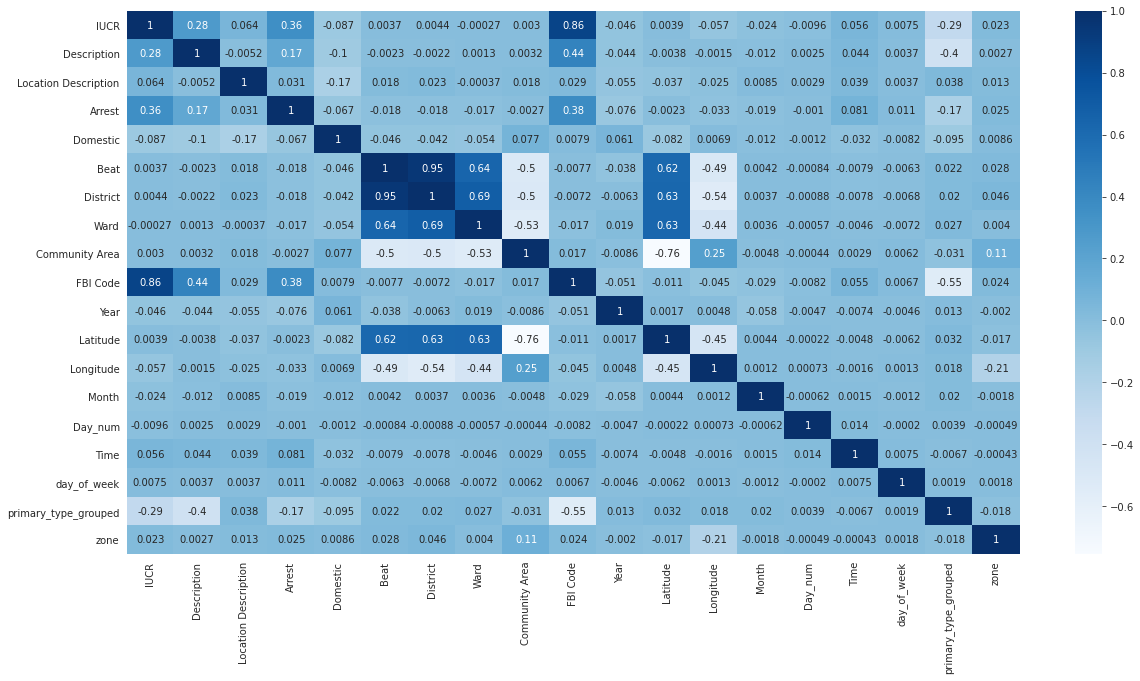

In [27]:
X_fs = crime.drop(['primary_type_grouped'], axis=1)
Y_fs = crime['primary_type_grouped']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = crime.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [28]:
cor_target = abs(cor['primary_type_grouped'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.03]
relevant_features

IUCR                    0.292668
Description             0.398370
Location Description    0.038127
Arrest                  0.166601
Domestic                0.095439
Community Area          0.031119
FBI Code                0.548101
Latitude                0.031977
primary_type_grouped    1.000000
Name: primary_type_grouped, dtype: float64

In [29]:
final_df= crime.filter(['IUCR','Description','Location Description','Arrest','Domestic','Community Area','FBI Code','Latitude','primary_type_grouped'],axis=1)

In [30]:
final_df.head()

,IUCR,Description,Location Description,Arrest,Domestic,Community Area,FBI Code,Latitude,primary_type_grouped
0,52,194,158,False,True,61.0,10,41.815117,3
1,95,348,68,False,False,25.0,7,41.895080,6
2,273,364,181,True,False,21.0,20,41.937406,2
3,75,428,17,False,True,25.0,9,41.881903,3
4,81,220,158,False,False,71.0,6,41.744379,6


In [34]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['primary_type_grouped',],axis=1),final_df['primary_type_grouped'], test_size=0.2, random_state=42)

In [35]:
scaler = MinMaxScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [36]:
classifier_l = LogisticRegression(random_state=42)

In [37]:
classifier_l.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred_l = classifier_l.predict(X_test)

In [39]:
conf_matrix_l = metrics.confusion_matrix(y_test, y_pred_l)
print(conf_matrix_l)

[[238207     50    926    153    228   2941   2010   1801]
 [    25   2665    432      0   6314     12    794      0]
 [    28      5 124105      0   8336      0      0      0]
 [     2      1      1 304291     40      0  24070      3]
 [  7738    134  17844     39  75678    263   1465     19]
 [ 11572   1064   3308   1877   1072      1   3684      0]
 [     2      2      0  10680      0      1 454256      2]
 [  9214      2    740      0      0      2      0   6723]]


In [55]:
target_names = ['CRIMINAL_OFFENSE','HUMAN_TRAFFICKING_OFFENSE','NARCOTIC_OFFENSE','NON_CRIMINAL_ASSAULT','OTHER_OFFENSE','SEXUAL_OFFENSE','THEFT','WEAPONS_OFFENSE']
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred_l))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred_l))
print(classification_report(y_true= y_test, y_pred= y_pred_l, target_names=target_names))

Accuracy =  0.9102551135171366
Error =  0.08974488648286338
                           precision    recall  f1-score   support

         CRIMINAL_OFFENSE       0.89      0.97      0.93    246316
HUMAN_TRAFFICKING_OFFENSE       0.68      0.26      0.38     10242
         NARCOTIC_OFFENSE       0.84      0.94      0.89    132474
     NON_CRIMINAL_ASSAULT       0.96      0.93      0.94    328408
            OTHER_OFFENSE       0.83      0.73      0.78    103180
           SEXUAL_OFFENSE       0.00      0.00      0.00     22578
                    THEFT       0.93      0.98      0.96    464943
          WEAPONS_OFFENSE       0.79      0.40      0.53     16681

                 accuracy                           0.91   1324822
                macro avg       0.74      0.65      0.67   1324822
             weighted avg       0.90      0.91      0.90   1324822



In [42]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[242362      0      0     10   1315   2629      0      0]
 [    16   3745    446      0   5628    407      0      0]
 [     2      2 124105      0   8365      0      0      0]
 [     6      0      0 248951     41      0  79410      0]
 [    54    656   5097     92  88463   6964   1854      0]
 [ 11618   1100    699   1013   1809   2547   3792      0]
 [     7      0      0  10369      0   3156 451411      0]
 [    21      0    120      0    224    162      0  16154]]


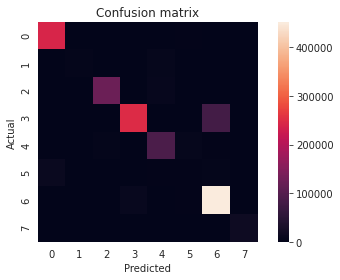

In [45]:
sns.heatmap(conf_matrix, square = True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [56]:
target_names = ['CRIMINAL_OFFENSE','HUMAN_TRAFFICKING_OFFENSE','NARCOTIC_OFFENSE','NON_CRIMINAL_ASSAULT','OTHER_OFFENSE','SEXUAL_OFFENSE','THEFT','WEAPONS_OFFENSE']
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_true= y_test, y_pred= y_pred, target_names=target_names))

Accuracy =  0.8889782929329374
Error =  0.1110217070670626
                           precision    recall  f1-score   support

         CRIMINAL_OFFENSE       0.95      0.98      0.97    246316
HUMAN_TRAFFICKING_OFFENSE       0.68      0.37      0.48     10242
         NARCOTIC_OFFENSE       0.95      0.94      0.94    132474
     NON_CRIMINAL_ASSAULT       0.96      0.76      0.85    328408
            OTHER_OFFENSE       0.84      0.86      0.85    103180
           SEXUAL_OFFENSE       0.16      0.11      0.13     22578
                    THEFT       0.84      0.97      0.90    464943
          WEAPONS_OFFENSE       1.00      0.97      0.98     16681

                 accuracy                           0.89   1324822
                macro avg       0.80      0.74      0.76   1324822
             weighted avg       0.89      0.89      0.88   1324822

